# Meta Methods

In [4]:
# Import libraries 

import numpy as np
import pandas as pd
import sklearn as sk

df = pd.read_csv("clean_student_por.csv")
df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,Passed
0,1,1,18,1,1,1,4,4,4,1,...,2,2,4,3,4,1,1,3,1,0
1,1,1,17,1,1,2,1,1,4,5,...,1,2,5,3,3,1,1,3,0,1
2,1,1,15,1,2,2,1,1,4,5,...,1,2,4,3,2,2,3,3,1,1
3,1,1,15,1,1,2,4,2,2,3,...,1,1,3,2,2,1,1,5,0,1
4,1,1,16,1,1,2,3,3,5,5,...,2,2,4,3,2,1,2,5,0,1


In [5]:
# Separate data from labels
X = df.drop(["Passed"], axis=1).values
y = df["Passed"]
print(X.shape)

(649, 30)


## Voting scheme

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cv=10

clf1 = GaussianNB()

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1, scoring='f1')
clf.fit(X, y)
print("Best Params fo Knn=", clf.best_params_, "F1 score=", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')

for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cv, scoring='f1')
    print("F1 score: %0.3f (+/-%0.3f) [%s]" % (scores.mean(), scores.std(), label))

Best Params fo Knn= {'n_neighbors': 19, 'weights': 'distance'} F1 score= 0.8785360694530282
F1 score: 0.859 (+/-0.067) [Naive Bayes]
F1 score: 0.879 (+/-0.011) [Knn (3)]
F1 score: 0.790 (+/-0.079) [Dec. Tree]


In [7]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='f1')
print("F1 score: %0.3f (+/-%0.3f) [%s]" % (scores.mean(), scores.std(), "Majority Voting"))

F1 score: 0.865 (+/-0.031) [Majority Voting]


In [8]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='soft', weights=[2,4,1])
scores = cross_val_score(eclf, X, y, cv=cv, scoring='f1')
print("F1 score: %0.3f (+/-%0.3f) [%s]" % (scores.mean(), scores.std(), "Weighted Voting"))

F1 score: 0.864 (+/-0.041) [Weighted Voting]


## Bagging

In [9]:
from sklearn.ensemble import BaggingClassifier

lb=[]
print("Bagging DT")
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=nest), X, y, 
                             cv=cv, scoring='f1')
    print("F1 score: %0.3f (+/-%0.3f) [%s]" % (scores.mean(), scores.std(), nest))
    lb.append(scores.mean())

lb2=[]
print("Bagging DT forced variance")
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=nest, 
                                               max_features=0.35), X, y, cv=cv, scoring='f1')
    print("F1 score: %0.3f (+/-%0.3f) [%s]" % (scores.mean(), scores.std(), nest))
    lb2.append(scores.mean())  

Bagging DT
F1 score: 0.809 (+/-0.065) [1]
F1 score: 0.748 (+/-0.127) [2]
F1 score: 0.809 (+/-0.103) [5]
F1 score: 0.815 (+/-0.108) [10]
F1 score: 0.822 (+/-0.104) [20]
F1 score: 0.840 (+/-0.070) [50]
F1 score: 0.834 (+/-0.069) [100]
F1 score: 0.831 (+/-0.084) [200]
Bagging DT forced variance
F1 score: 0.782 (+/-0.055) [1]
F1 score: 0.730 (+/-0.087) [2]
F1 score: 0.823 (+/-0.069) [5]
F1 score: 0.827 (+/-0.053) [10]
F1 score: 0.858 (+/-0.023) [20]
F1 score: 0.859 (+/-0.029) [50]
F1 score: 0.858 (+/-0.026) [100]
F1 score: 0.861 (+/-0.026) [200]


## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
print("Random Forest")
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cv, scoring='f1')
    print("F1 score: %0.3f (+/-%0.3f) [%s]" % (scores.mean(), scores.std(), nest))
    lrf.append(scores.mean())

Random Forest
F1 score: 0.758 (+/-0.139) [1]
F1 score: 0.751 (+/-0.076) [2]
F1 score: 0.841 (+/-0.072) [5]
F1 score: 0.832 (+/-0.072) [10]
F1 score: 0.846 (+/-0.070) [20]
F1 score: 0.862 (+/-0.050) [50]
F1 score: 0.855 (+/-0.045) [100]
F1 score: 0.860 (+/-0.047) [200]


In [13]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
print("Extra Trees")
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cv, scoring='f1')
    print("F1 score: %0.3f (+/-%0.3f) [%s]" % (scores.mean(), scores.std(), nest))
    lext.append(scores.mean())

Extra Trees
F1 score: 0.797 (+/-0.062) [1]
F1 score: 0.732 (+/-0.132) [2]
F1 score: 0.833 (+/-0.072) [5]
F1 score: 0.828 (+/-0.088) [10]
F1 score: 0.843 (+/-0.071) [20]
F1 score: 0.853 (+/-0.058) [50]
F1 score: 0.855 (+/-0.050) [100]
F1 score: 0.853 (+/-0.045) [200]


## Boosting

In [13]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
print("AdaBoost Dec.Stumps")
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cv, scoring='f1')
    print("F1 score %0.3f (+/-%0.3f) [%s]" % (scores.mean(), scores.std(), nest))
    lboo.append(scores.mean())

AdaBoost Dec.Stumps
F1 score 0.889 (+/-0.023) [1]
F1 score 0.889 (+/-0.023) [2]
F1 score 0.893 (+/-0.021) [5]
F1 score 0.881 (+/-0.031) [10]
F1 score 0.868 (+/-0.046) [20]
F1 score 0.856 (+/-0.051) [50]
F1 score 0.855 (+/-0.056) [100]
F1 score 0.844 (+/-0.059) [200]


In [14]:
from sklearn.ensemble import AdaBoostClassifier

lboodt=[]
print("AdaBoost DT")
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cv, 
                             scoring='f1')
    print("F1 score: %0.3f (+/-%0.3f) [%s]" % (scores.mean(), scores.std(), nest))
    lboodt.append(scores.mean())

AdaBoost DT
F1 score: 0.822 (+/-0.068) [1]
F1 score: 0.831 (+/-0.057) [2]
F1 score: 0.824 (+/-0.067) [5]
F1 score: 0.821 (+/-0.065) [10]
F1 score: 0.849 (+/-0.033) [20]
F1 score: 0.843 (+/-0.061) [50]
F1 score: 0.837 (+/-0.050) [100]
F1 score: 0.852 (+/-0.034) [200]


In [19]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
print("Gradient Boosting")
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='f1')
    print("F1 score: %0.3f (+/-%0.3f) [%s]" % (scores.mean(), scores.std(), nest))
    lgbboo.append(scores.mean())

Gradient Boosting
F1 score: 0.862 (+/-0.003) [1]
F1 score: 0.862 (+/-0.003) [2]
F1 score: 0.860 (+/-0.011) [5]
F1 score: 0.862 (+/-0.018) [10]
F1 score: 0.864 (+/-0.034) [20]
F1 score: 0.854 (+/-0.059) [50]
F1 score: 0.845 (+/-0.065) [100]
F1 score: 0.843 (+/-0.062) [200]


In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')
plt.xlabel('nest')
plt.ylabel('F1 score')
plt.savefig('Meta-methods.png', dpi=600)
plt.show()
plt.close()

NameError: name 'lboo' is not defined

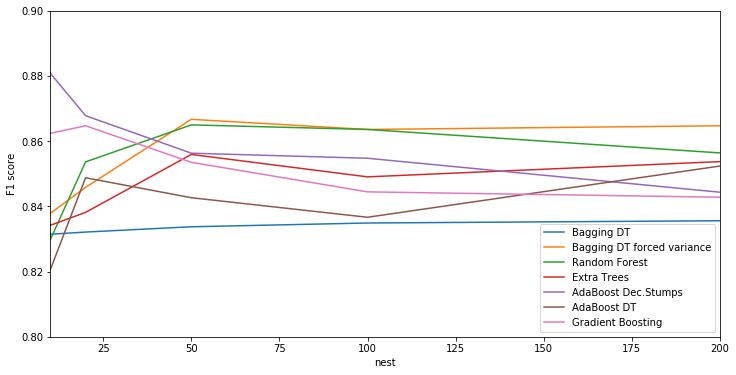

In [18]:
plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')
plt.xlim(10,200)
plt.ylim(0.80,0.90)
plt.xlabel('nest')
plt.ylabel('F1 score')
plt.savefig('EnlargeView_Meta-methods.png', dpi=600)
plt.show()
plt.close()

## Measures for the two best models

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
knc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200, max_features=0.35)
knc.fit(X, y)
pred = cross_val_predict(knc, X=X, y=y, cv=cv)
best_confmat = confusion_matrix(y, pred)
print("Bagging DT forced variance with 200 nest")
print("Confusion matrix:")
print(best_confmat)
print("Accuracy: %s" % accuracy_score(y, pred))
print("F1 score: %s" % f1_score(y, pred))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(best_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(best_confmat.shape[0]):
    for j in range(best_confmat.shape[1]):
        ax.text(x=j, y=i, s=best_confmat[i, j], va='center', ha='center', fontsize=7)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.savefig('ConMatrix_BaggingDT_forced.png', dpi=600)
plt.close()

print()
knc = RandomForestClassifier(n_estimators=100)
knc.fit(X, y)
pred = cross_val_predict(knc, X=X, y=y, cv=cv)
best_confmat = confusion_matrix(y, pred)
print("Random Forest with 100 nest")
print("Confusion matrix:")
print(best_confmat)
print("Accuracy: %s" % accuracy_score(y, pred))
print("F1 score: %s" % f1_score(y, pred))
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(best_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(best_confmat.shape[0]):
    for j in range(best_confmat.shape[1]):
        ax.text(x=j, y=i, s=best_confmat[i, j], va='center', ha='center', fontsize=7)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.savefig('ConMatrix_BestModel_RandomForest.png', dpi=600)
plt.close()

Bagging DT forced variance with 200 nest
Confusion matrix:
[[ 37 120]
 [ 27 465]]
Accuracy: 0.773497688751926
F1 score: 0.863509749303621

Random Forest with 100 nest
Confusion matrix:
[[ 61  96]
 [ 45 447]]
Accuracy: 0.7827426810477658
F1 score: 0.863768115942029


## Feature Selection with Forests of trees

In [14]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)
print(clf.feature_importances_)  

[0.04792767 0.02127861 0.03791953 0.01659722 0.01491823 0.01203515
 0.03849646 0.04650071 0.03468573 0.02489429 0.03495747 0.02290614
 0.03539029 0.03603259 0.12944629 0.01268052 0.01808284 0.00783968
 0.01589009 0.01551985 0.05542101 0.0229033  0.01556227 0.04518558
 0.04337829 0.04305371 0.02773085 0.04203553 0.03530954 0.04542055]


In [15]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True, threshold=0.05)
X_new = model.transform(X)
print(X_new.shape)

print(np.mean(cross_val_score(KNeighborsClassifier(), X=X, y=y, cv=cv, scoring='f1')))
print(np.mean(cross_val_score(KNeighborsClassifier(), X=X_new, y=y, cv=cv, scoring='f1')))

(649, 2)
0.8573749825308472
0.883092134029653


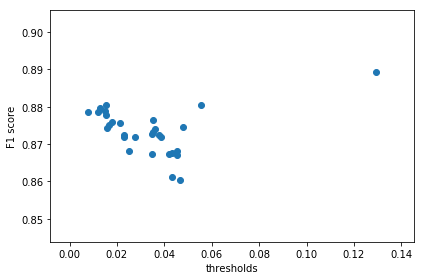

Best threshold:  0.129446291354577


In [23]:
thresholds=clf.feature_importances_

l=[]
lparval=[]
for threshold in thresholds:
    model = SelectFromModel(clf, prefit=True, threshold=threshold)
    X_new = model.transform(X)
    params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
    knc = KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1, scoring='f1')
    clf2.fit(X, y)
    parval=clf2.best_params_
    clf3 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
    f1_score = np.mean(cross_val_score(clf3, X=X_new, y=y, cv=cv, scoring='f1'))
    l.append(f1_score)
    lparval.append(parval)
    
plt.scatter(thresholds,l)
plt.xlabel('thresholds')
plt.ylabel('F1 score')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=600)
plt.show()
plt.close()

print('Best threshold: ',thresholds[np.argmax(l)])

In [24]:
parval=lparval[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X)
print(X_new.shape)

print('Original: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=parval['n_neighbors'],
                                                                weights=parval['weights']), X=X, y=y, cv=cv, scoring='f1')))
print('With FS: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=parval['n_neighbors'],
                                                                weights=parval['weights']), X=X_new, y=y, cv=cv, 
                                           scoring='f1')))

(649, 1)
Original:  0.8785912585742928
With FS:  0.8892931264351691


## Measures for KNN after Feasure Selection

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
knc = KNeighborsClassifier(n_neighbors=parval['n_neighbors'], weights=parval['weights'])
knc.fit(X, y)
pred = cross_val_predict(knc, X=X_new, y=y, cv=cv)
best_confmat = confusion_matrix(y, pred)
print("Confusion matrix:")
print(best_confmat)
print("Accuracy: %s" % accuracy_score(y, pred))
print("F1 score: %s" % f1_score(y, pred))
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(best_confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(best_confmat.shape[0]):
    for j in range(best_confmat.shape[1]):
        ax.text(x=j, y=i, s=best_confmat[i, j], va='center', ha='center', fontsize=7)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.savefig('ConMatrix_BestModel_KNN_Selection.png', dpi=600)
plt.close()

Confusion matrix:
[[ 71  86]
 [ 29 463]]
Accuracy: 0.8228043143297381
F1 score: 0.8895292987512008
